100%|██████████| 9.91M/9.91M [00:10<00:00, 942kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.89MB/s]


Training...
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Test Accuracy: 97.86%


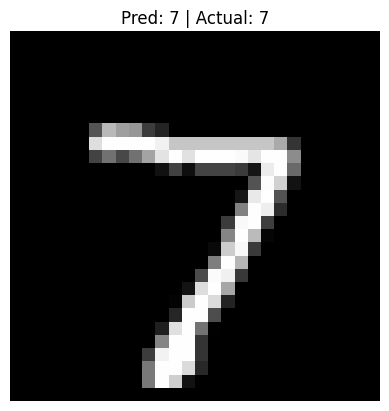

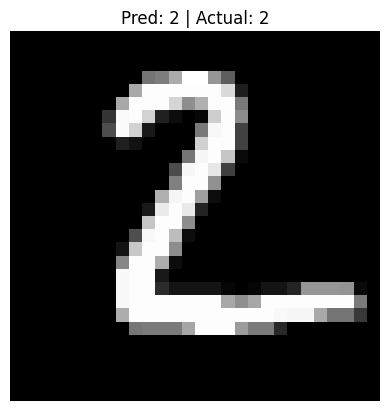

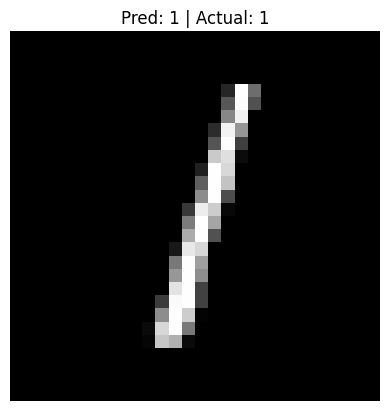

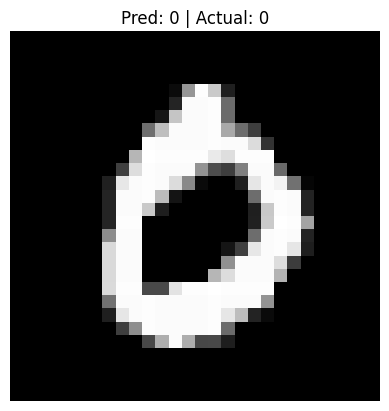

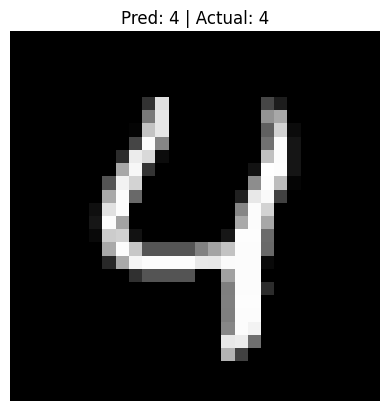

In [1]:
#dbnimageclassification
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load data
transform = transforms.ToTensor()
train_loader = DataLoader(datasets.MNIST('./data', train=True, download=True, transform=transform), batch_size=64, shuffle=True)
test_loader = DataLoader(datasets.MNIST('./data', train=False, download=True, transform=transform), batch_size=1000)

# Define model
class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    def forward(self, x):
        return self.fc(x.view(-1, 28*28))

model = SimpleMLP()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Training
print("Training...")
for epoch in range(5):
    for imgs, labels in train_loader:
        preds = model(imgs)
        loss = loss_fn(preds, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} complete")

# Testing
model.eval()
correct = total = 0
with torch.no_grad():
    for imgs, labels in test_loader:
        preds = model(imgs).argmax(1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Predict 5 test images
images, labels = next(iter(test_loader))
with torch.no_grad():
    preds = model(images[:5]).argmax(1)

for i in range(5):
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {preds[i].item()} | Actual: {labels[i].item()}")
    plt.axis('off')
    plt.show()
